In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

In [1]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')
df = df.drop(columns=df.columns[0])

y = df.y
y[y > 1] = 0
X = df.drop(['y'], axis=1)
Y = df['y'].values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=10, gamma='auto', kernel='rbf'))
])


svc_pipeline.fit(X_train, y_train)


def predict(x):
    return svc_pipeline.predict(x)


svc_pred = predict(X_test)
acc_svc = accuracy_score(y_test, svc_pred) * 100
print("Accuracy is:", str(acc_svc) + '%')

NameError: name 'pd' is not defined

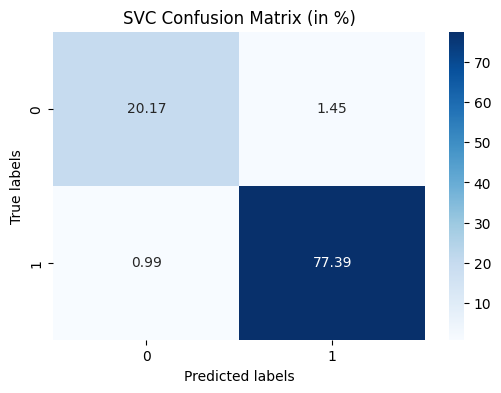

In [20]:
cm = confusion_matrix(y_test, svc_pred)

total_samples = np.sum(cm)
tp_percentage = (cm[1, 1] / total_samples) * 100
tn_percentage = (cm[0, 0] / total_samples) * 100
fp_percentage = (cm[0, 1] / total_samples) * 100
fn_percentage = (cm[1, 0] / total_samples) * 100

percentages = np.array([[tp_percentage, fn_percentage],
                        [fp_percentage, tn_percentage]])

plt.figure(figsize=(6, 4))
sns.heatmap(percentages, annot=True, fmt=".2f", cmap="Blues")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVC Confusion Matrix (in %)')
plt.show()

Accuracy is: 97.53623188405797%


PermutationExplainer explainer: 101it [23:45, 14.26s/it]                         


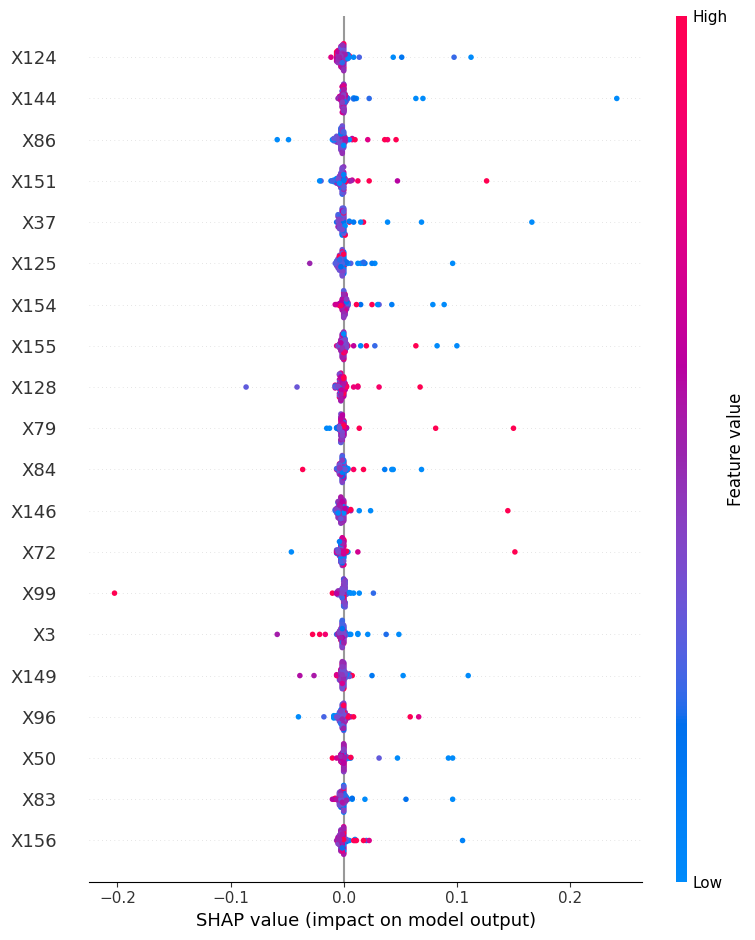

In [26]:
import shap
shap.initjs()

explainer = shap.Explainer(predict, X_train)

# the SHAP values for the first 100 instances in the test set
shap_values = explainer.shap_values(X_test[:100])


shap.summary_plot(shap_values, X_test[:100])

""" summary plot shows the distribution of the SHAP values for each feature and
 helps to identify which features have the most impact on the model's predictions"""


In [25]:
X_test[:100].shape

(100, 178)

In [27]:
shap_values.shape

(100, 178)

In [30]:
# This runs Faster
shape_values_bin = explainer(X_test[:100])

PermutationExplainer explainer: 101it [07:32,  4.62s/it]                         


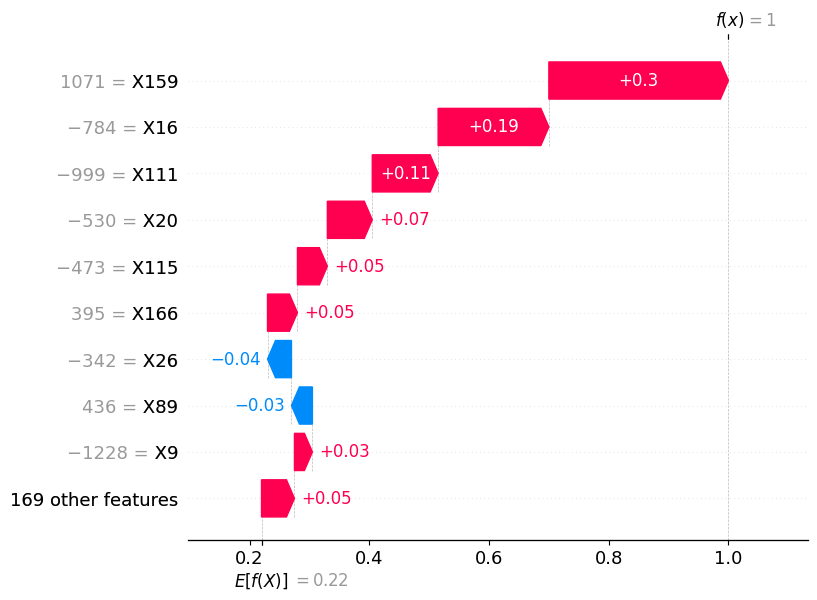

In [41]:
shap.plots.waterfall(shape_values_bin[2])

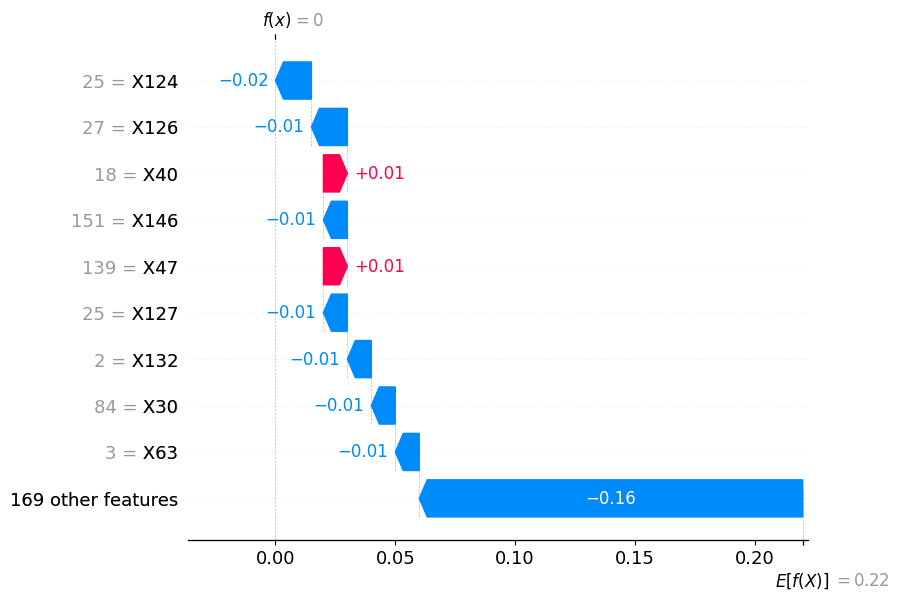

In [46]:
shap.plots.waterfall(shape_values_bin[0])

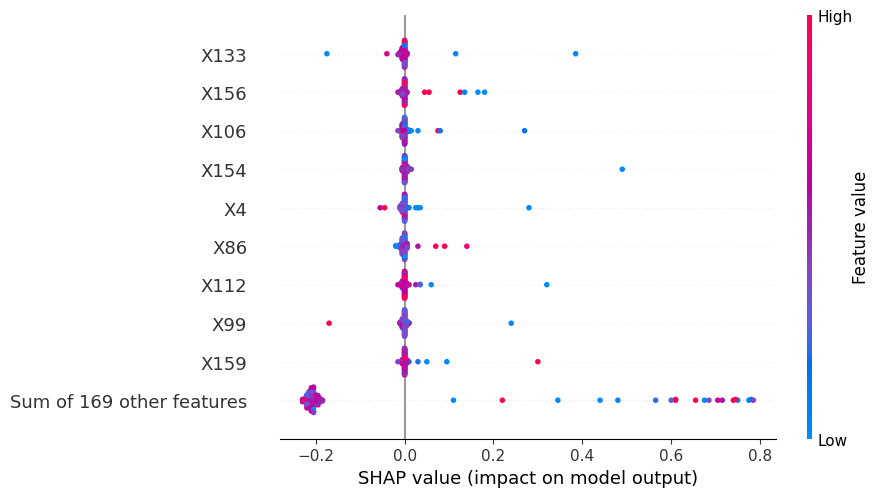

In [47]:
shap.plots.beeswarm(shape_values_bin)

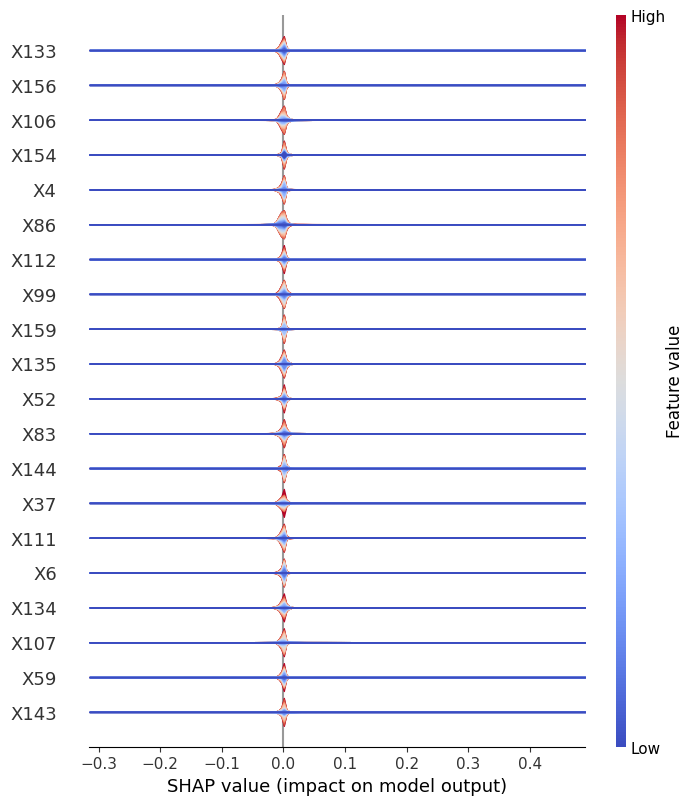

In [49]:
shap.plots.violin(shape_values_bin, plot_type="layered_violin")

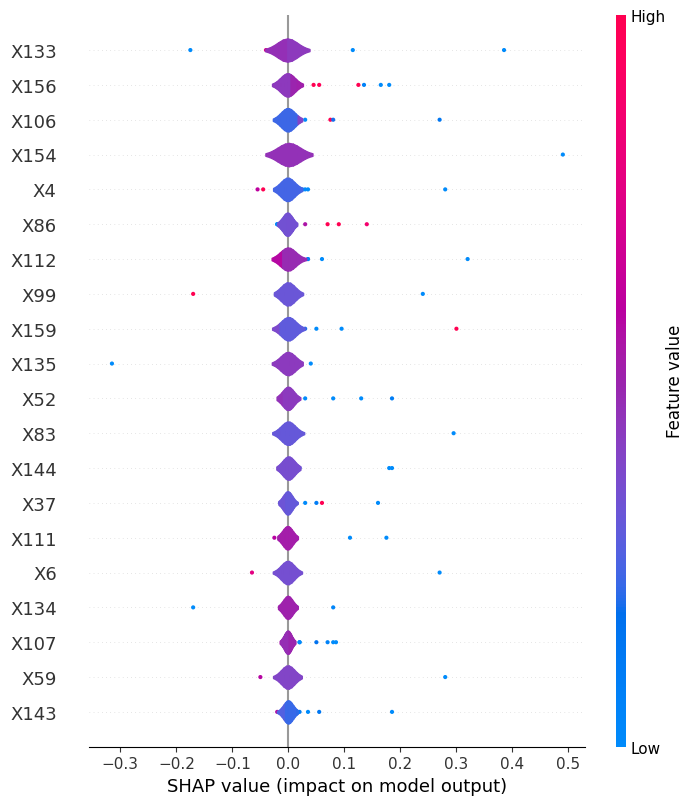

In [50]:
shap.plots.violin(shape_values_bin)

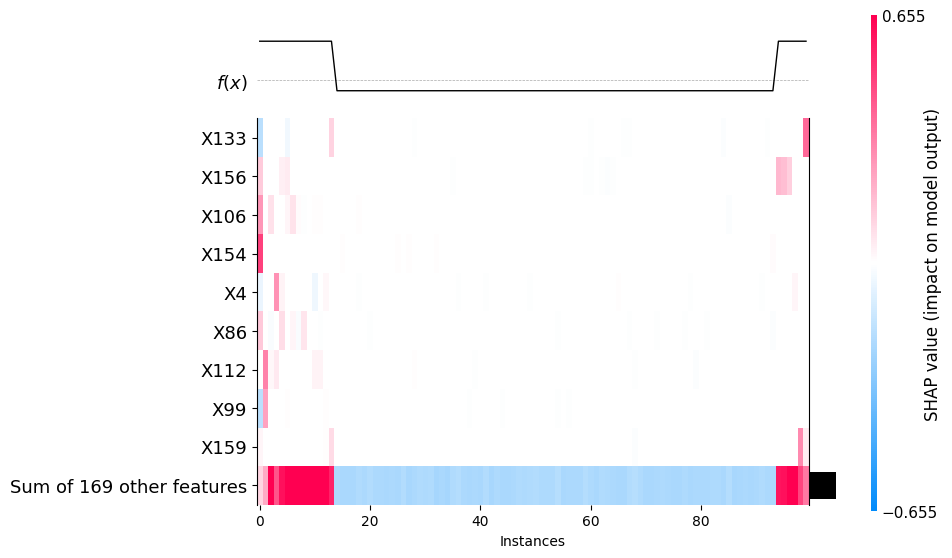

In [51]:
shap.plots.heatmap(shape_values_bin)

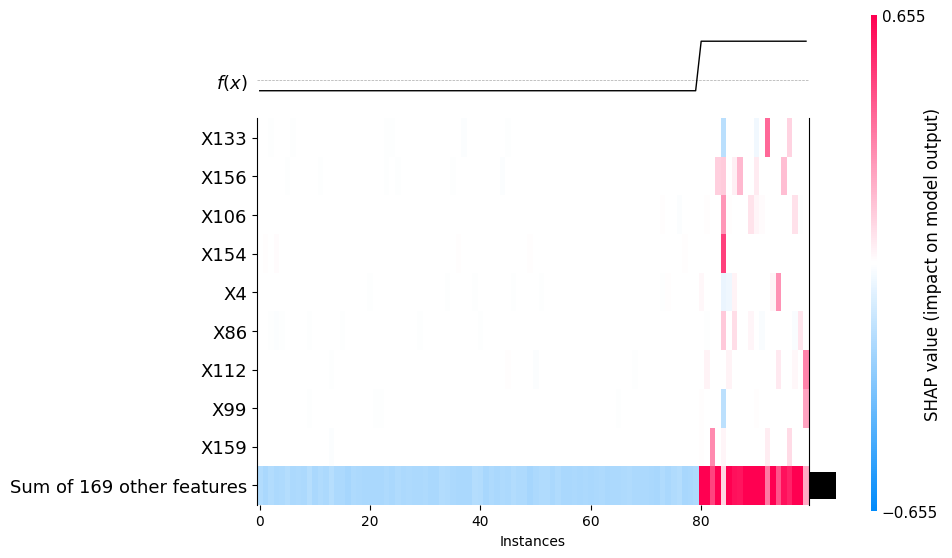

In [54]:
# order by predictions
order = np.argsort(svc_pred[:100])
shap.plots.heatmap(shape_values_bin, instance_order=order)